# House Prices Prediction

Các bước EDA:

-   Check duplicated value

-   Check missing value
-   Loại bỏ Outliers
-   phân tích SalePrice
-   Phân tích độ tương quan, mối qhe của các đặc trưng
-   Phân tích đơn , đa các đặc trưng tương quan mạnh



Preprocess
-    mising , encode, scaling khi merge train+test

### Import packages

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

from math import sqrt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
# from catboost import CatBoostRegressor

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

pd.pandas.set_option('display.max_columns', None)


### Load Dataset

In [110]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
sample_submission = pd.read_csv('./data/sample_submission.csv')


#tách saleprice
y = df_train["SalePrice"]
X = df_train.drop("SalePrice", axis=1)

df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Checking dup

In [111]:
df_train.duplicated().sum(), df_test.duplicated().sum()

(np.int64(0), np.int64(0))

### Outliers 
Kiem tra ngoai le cho cac dac trung truoc khi xu ly du lieu thieu

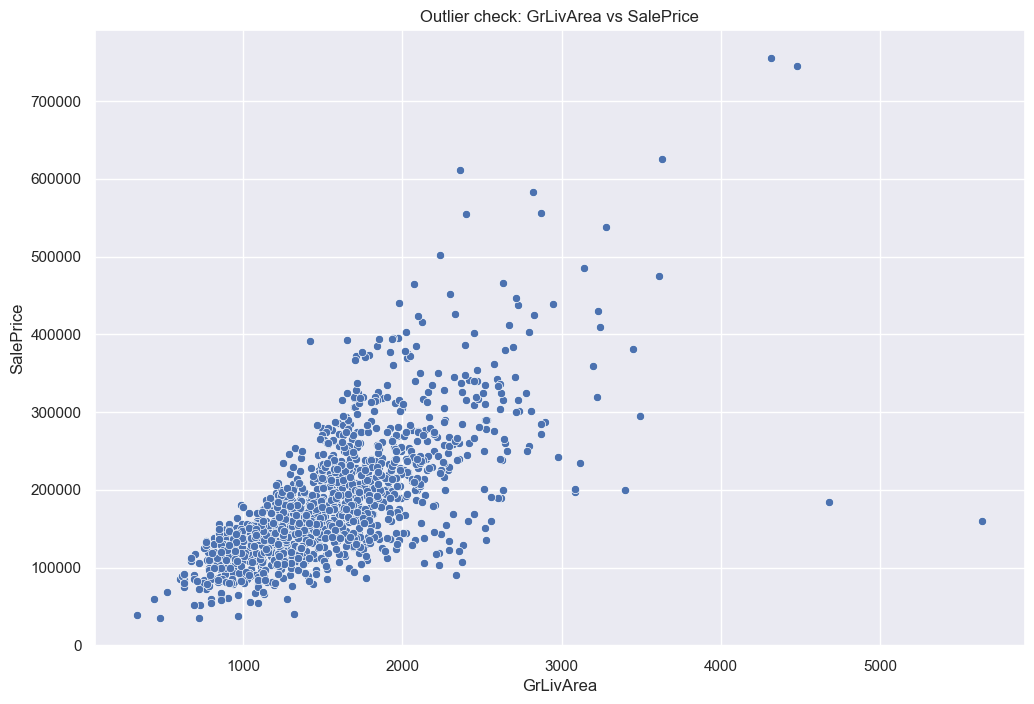

In [112]:
sns.scatterplot(x=df_train["GrLivArea"], y=df_train["SalePrice"])
plt.title("Outlier check: GrLivArea vs SalePrice")
plt.show()


Ta thấy được với GrLivArea > 4000 có các điểm SalePrice thấp bất thường nên cần loại bỏ

In [113]:
df_train = df_train[df_train['GrLivArea'] < 4000]

Ảnh hưởng của zoning đối với saleprice
       A    Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	

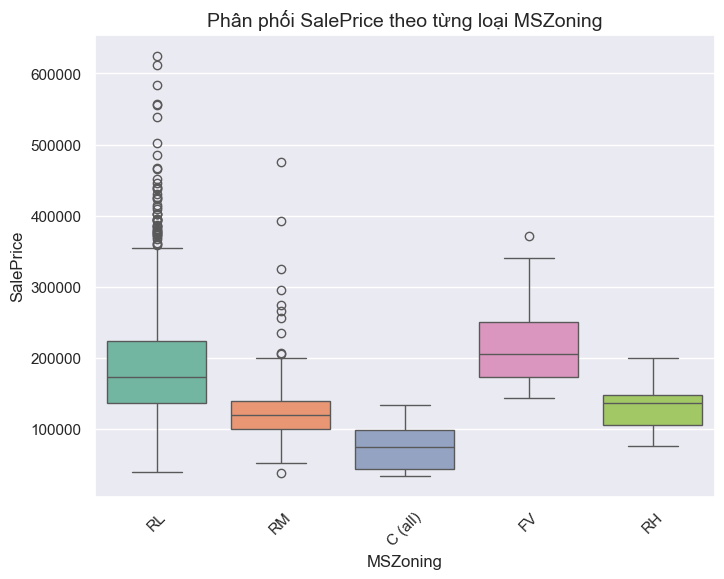

In [114]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df_train, x='MSZoning', y='SalePrice', palette='Set2')

plt.title('Phân phối SalePrice theo từng loại MSZoning', fontsize=14)
plt.ylabel('SalePrice')
plt.xlabel('MSZoning')
plt.xticks(rotation=45)
plt.show()


bieu do phan tich mqh cua garage quality , condition va sle price

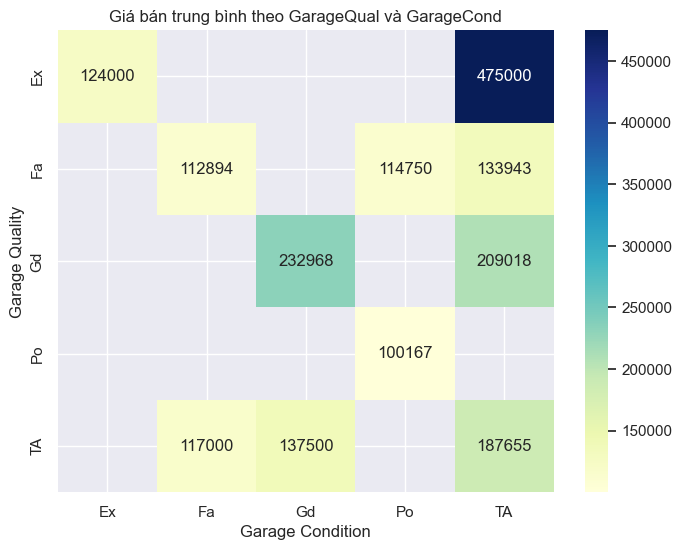

In [115]:
# Tạo bảng pivot
pivot = df_train.pivot_table(
    values='SalePrice',
    index='GarageQual',
    columns='GarageCond',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Giá bán trung bình theo GarageQual và GarageCond')
plt.xlabel('Garage Condition')
plt.ylabel('Garage Quality')
plt.show()


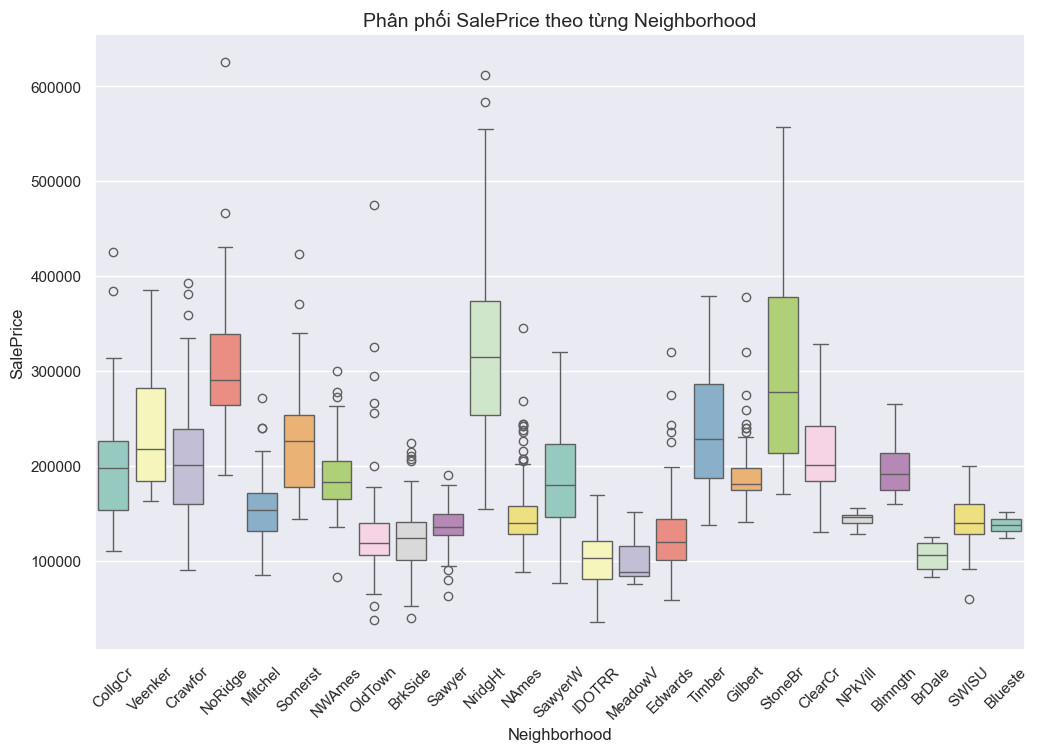

In [116]:
sns.boxplot(data=df_train, x='Neighborhood', y='SalePrice', palette='Set3')
sns.set(rc={'figure.figsize':(12,8)})
plt.title('Phân phối SalePrice theo từng Neighborhood', fontsize=14)
plt.ylabel('SalePrice')
plt.xlabel('Neighborhood')
plt.xticks(rotation=45)
plt.show()

#### Tìm outliers của các đặc trưng numerical trước khi tới missing value

In [117]:
# numerical_df = df_train.select_dtypes(exclude=['object'])
# numerical_df = numerical_df.drop(['Id'], axis=1)

# for col in numerical_df:
#     plt.figure(figsize = (16,4))
#     sns.set_theme(style="whitegrid")
#     sns.boxplot(x=numerical_df[col], orient ='h')
#     plt.xlabel(col)
#     plt.show

### Missing value

In [118]:
### Kiem tra missing value
total_missing = pd.DataFrame(df_train.isnull().sum(), columns=['Total Missing'])
total_missing = total_missing[total_missing['Total Missing'] > 0]
total_missing.sort_values(by='Total Missing', ascending=False)

Total Missing
PoolQC                 1451
MiscFeature            1402
Alley                  1365
Fence                  1176
MasVnrType              871
FireplaceQu             690
LotFrontage             259
GarageType               81
GarageYrBlt              81
GarageFinish             81
GarageQual               81
GarageCond               81
BsmtExposure             38
BsmtFinType2             38
BsmtQual                 37
BsmtCond                 37
BsmtFinType1             37
MasVnrArea                8
Electrical                1

### Target features distribution

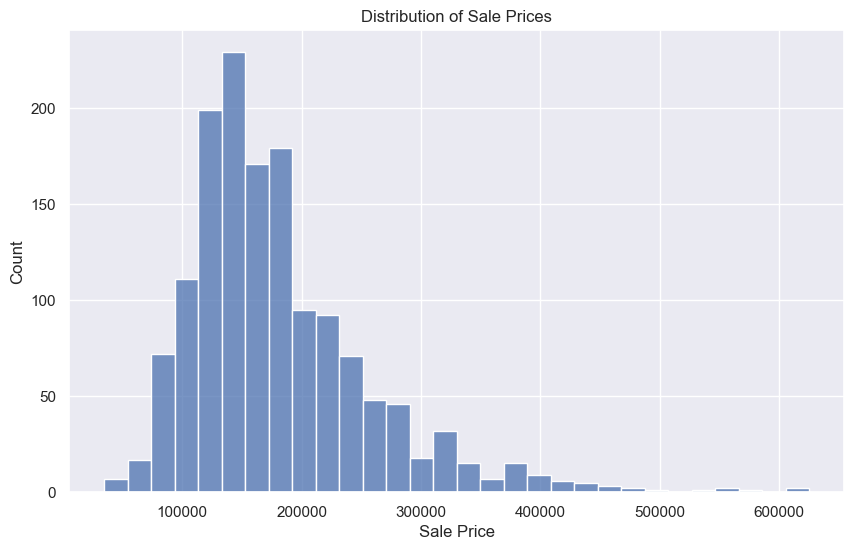

In [119]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_train, x='SalePrice', bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.show()

Ta thấy SalePrice bị lệch phải (right-schewed) -> nên cần log-transform

SalePrice sau khi log-transform

### Correlation Heatmap

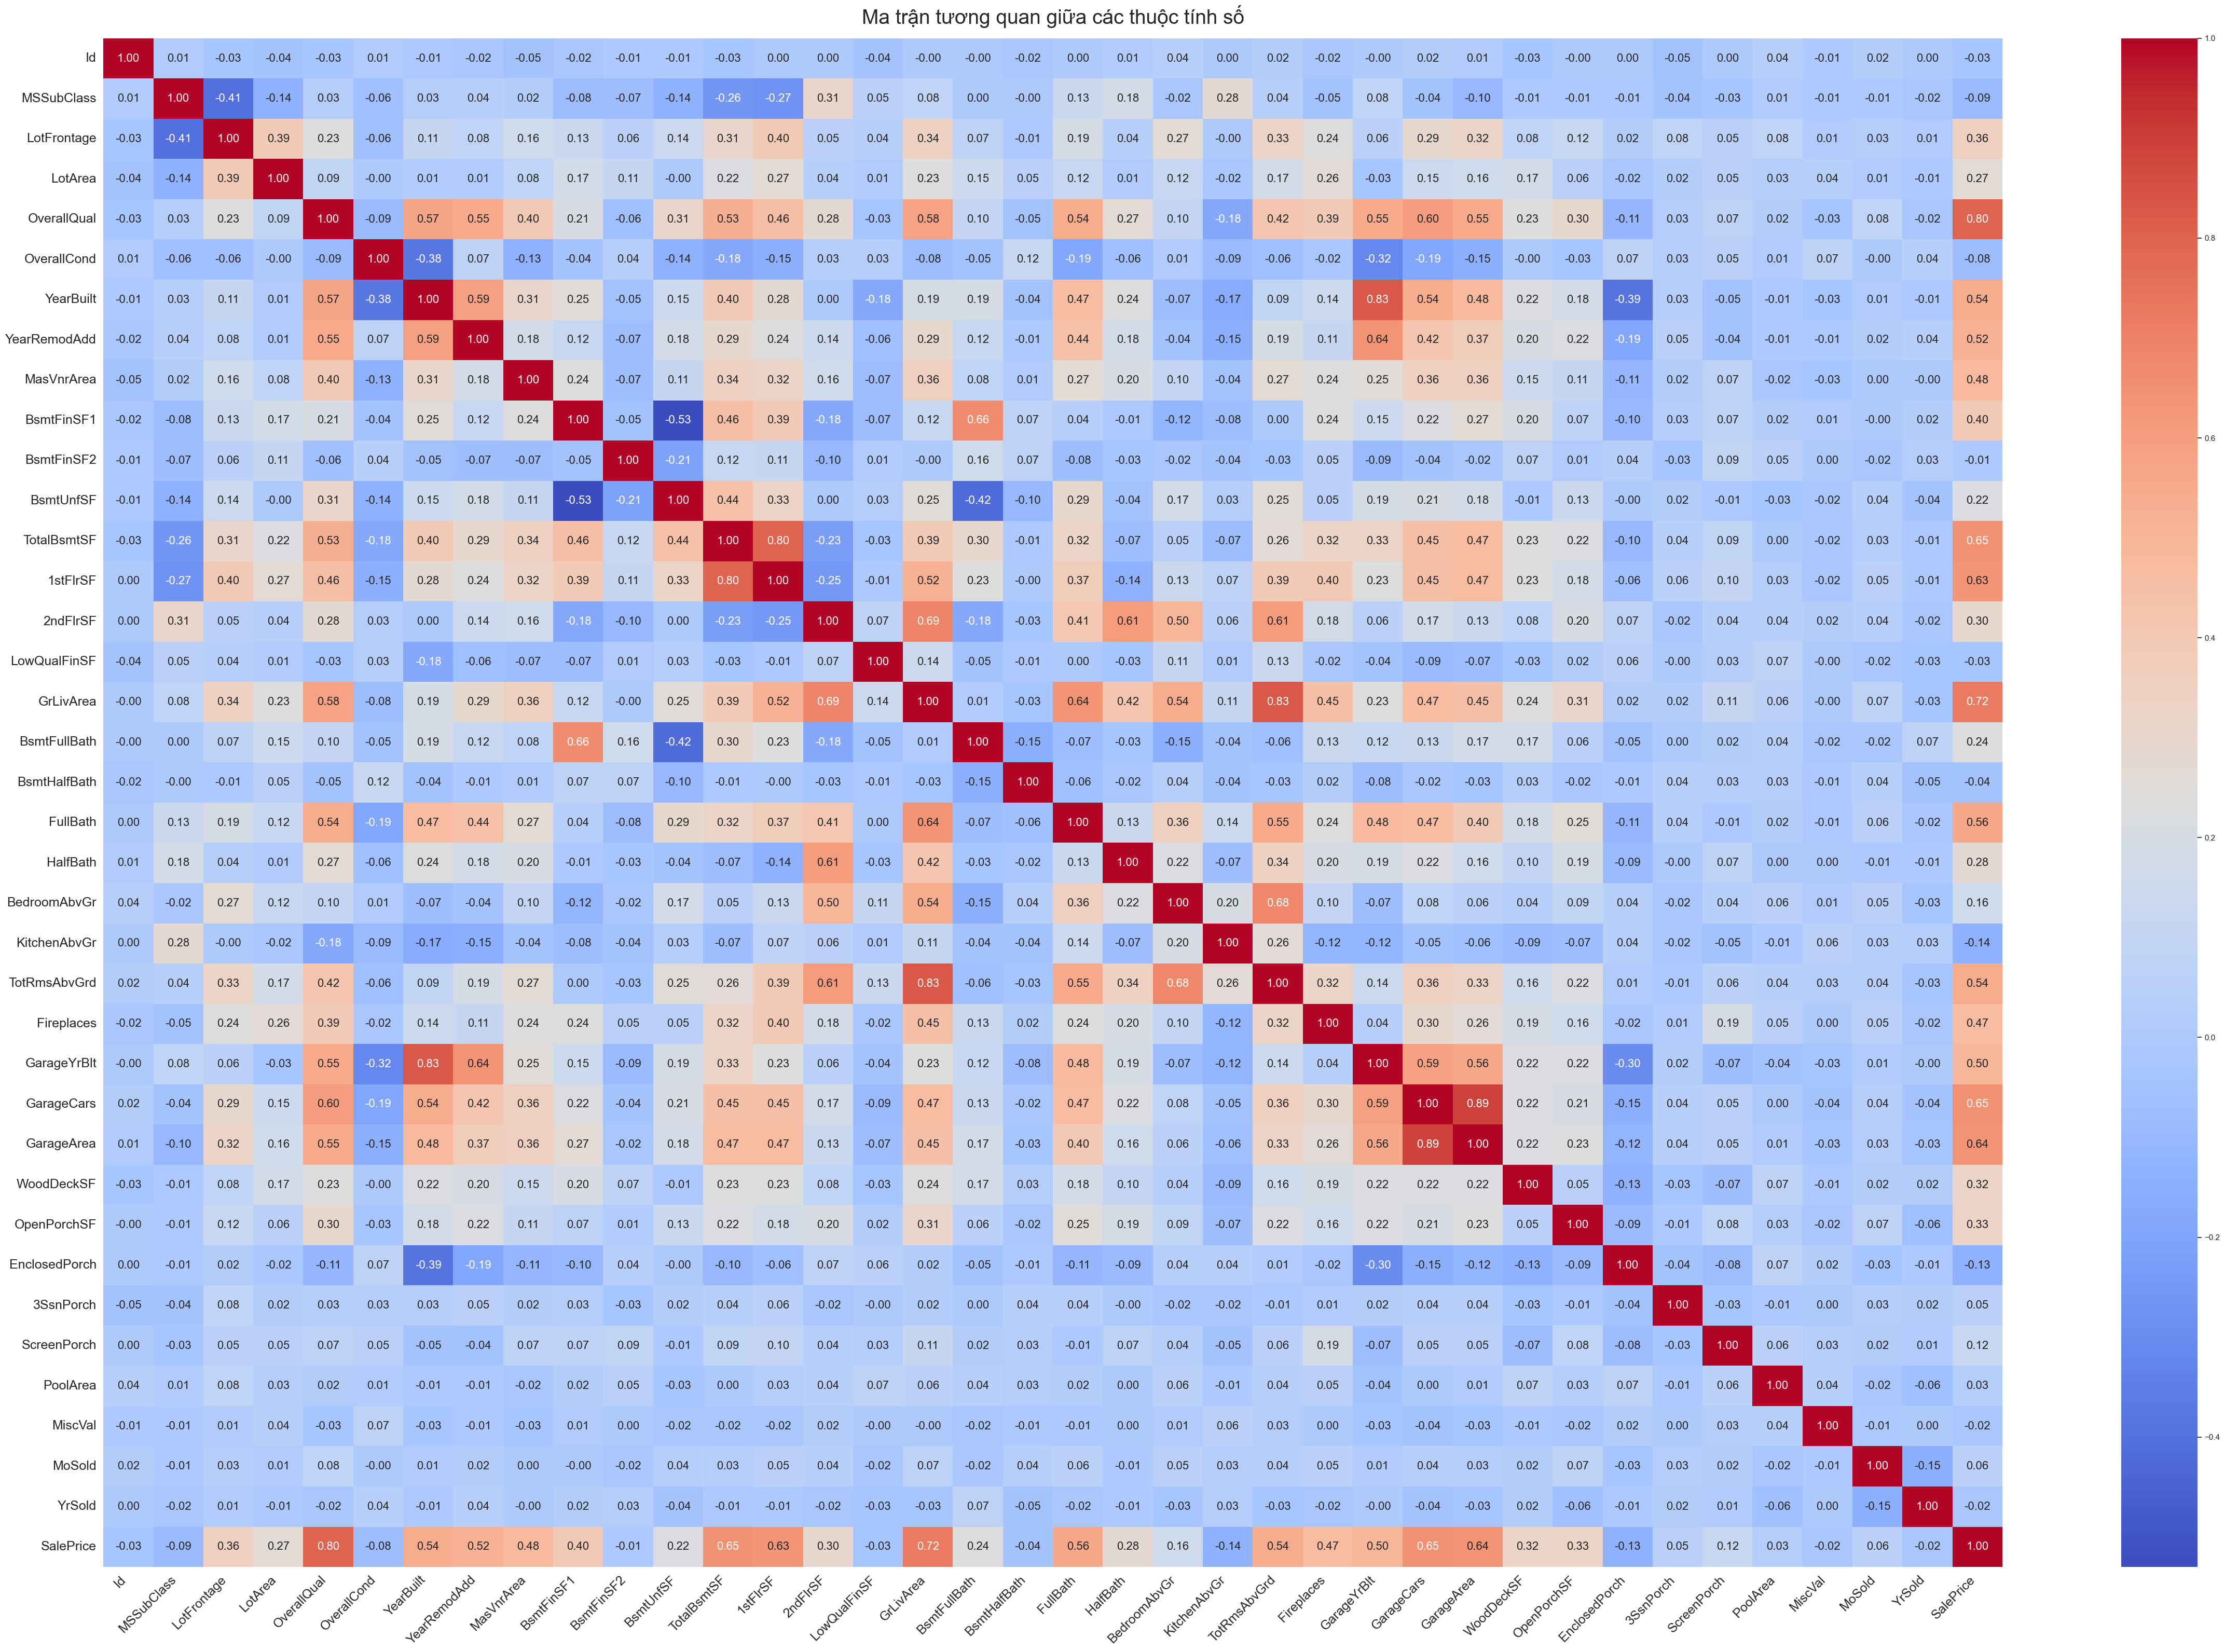

In [120]:


numerical_df = df_train.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr().round(2)

plt.figure(figsize=(48, 32))
sns.heatmap(
    data=correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='0.2f',
    annot_kws={"size": 16}
)

# ✅ Tăng kích thước chữ cho tên thuộc tính
plt.xticks(fontsize=18, rotation=45, ha='right')  # Xoay cho dễ đọc
plt.yticks(fontsize=18)

plt.title("Ma trận tương quan giữa các thuộc tính số", fontsize=28, pad=20)
plt.tight_layout()
plt.show()


Heatmap cua cac caterogical features

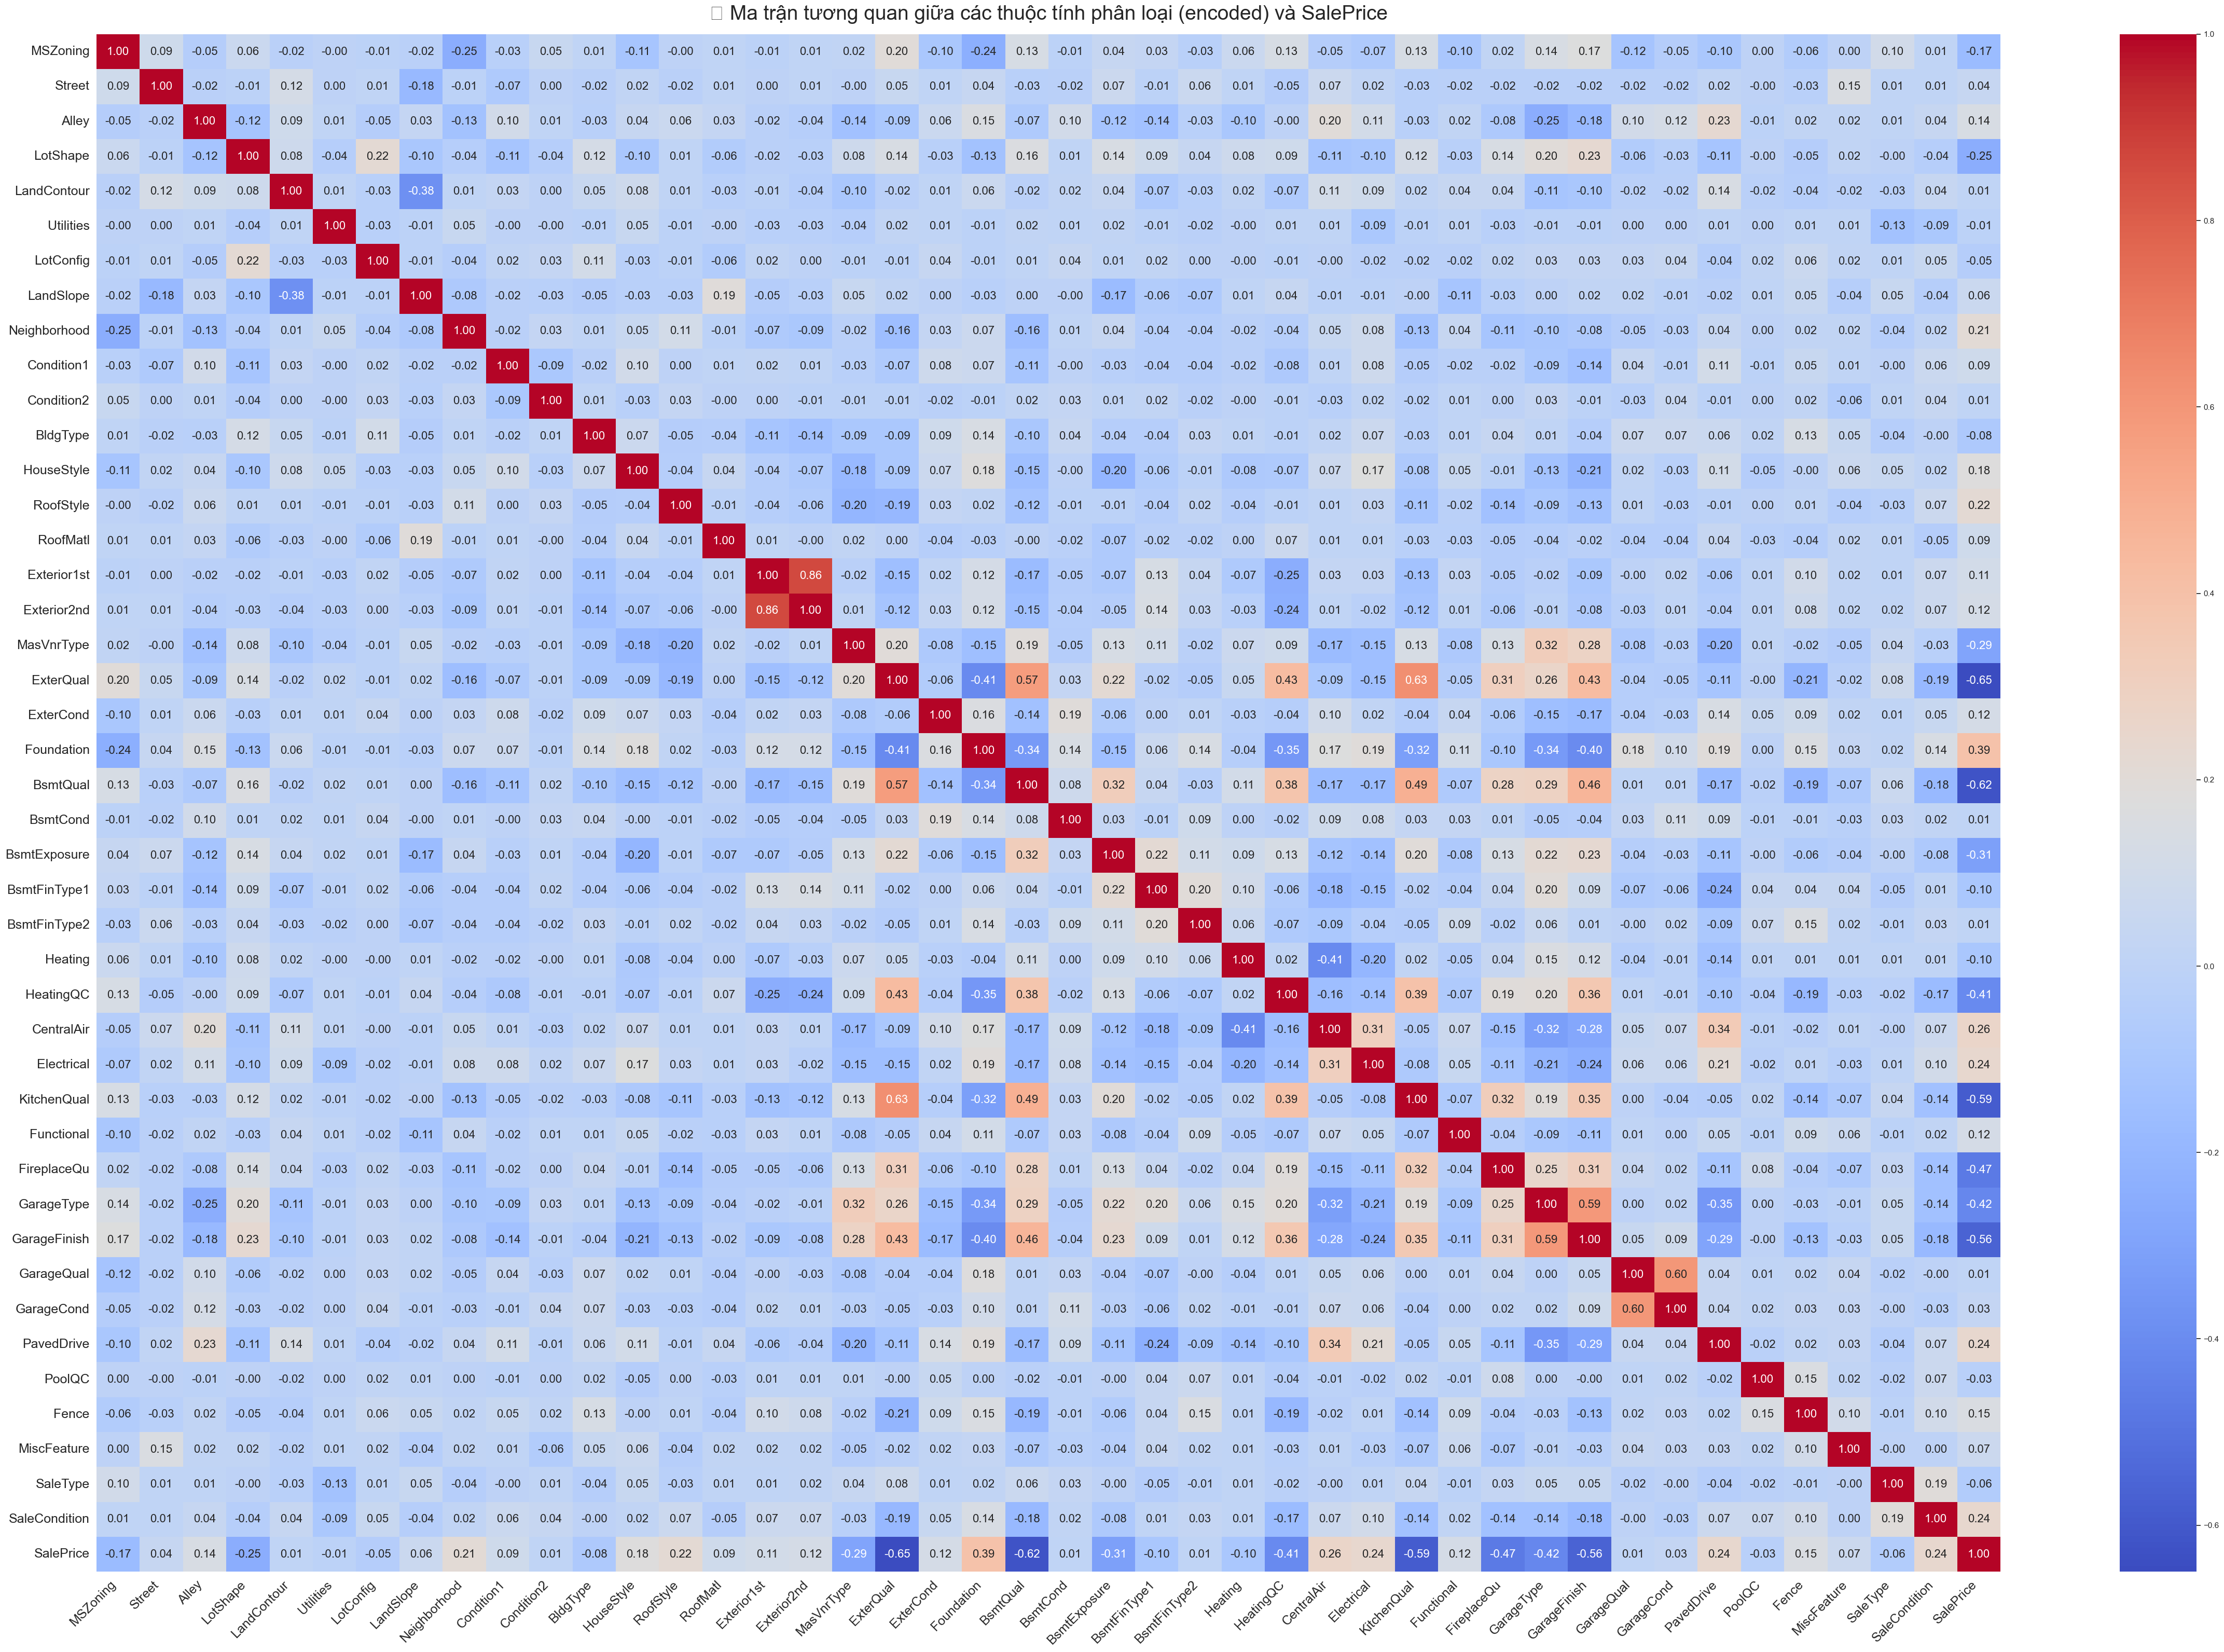

In [121]:
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Chọn các cột dạng object (categorical)
categorical_df = df_train.select_dtypes(include=['object']).copy()

# 2️⃣ Encode từng cột thành dạng số
le = LabelEncoder()
for col in categorical_df.columns:
    categorical_df[col] = le.fit_transform(categorical_df[col].astype(str))

# 3️⃣ Ghép lại cột SalePrice để tính tương quan
cat_corr = categorical_df.copy()
cat_corr['SalePrice'] = df_train['SalePrice']

# 4️⃣ Tính ma trận tương quan
corr_matrix = cat_corr.corr().round(2)

# 5️⃣ Vẽ heatmap
plt.figure(figsize=(48, 32))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 16}
)

plt.xticks(fontsize=18, rotation=45, ha='right')
plt.yticks(fontsize=18)
plt.title("🔶 Ma trận tương quan giữa các thuộc tính phân loại (encoded) và SalePrice", fontsize=28, pad=20)
plt.tight_layout()
plt.show()


Ta sẽ bắt đầu tìm hiểu các đặc trưng có cor > 0.6 với SalePrice 
và các đặc trung có tương quan mạnh với nhau > 0.7
-   0.89 garage car , garage area
-   0.83 lot

### Preprocessing

### Merge dataset
ta sẽ gộp 2 datasets train và test để điền missing value

In [122]:
df = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)

df.shape

(2915, 81)

### Fill missing value sau khi merge

In [123]:
df.isnull().sum().sort_values(ascending=False).head(36)

PoolQC          2907
MiscFeature     2810
Alley           2717
Fence           2345
MasVnrType      1765
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtFullBath       2
Utilities          2
BsmtHalfBath       2
SaleType           1
BsmtFinSF2         1
BsmtFinSF1         1
TotalBsmtSF        1
BsmtUnfSF          1
Exterior2nd        1
KitchenQual        1
GarageCars         1
GarageArea         1
Electrical         1
Exterior1st        1
HouseStyle         0
dtype: int64

In [124]:
print(df['PoolQC'].unique())
print("")
print(df['PoolQC'].value_counts())

[nan 'Ex' 'Fa' 'Gd']

PoolQC
Ex    3
Gd    3
Fa    2
Name: count, dtype: int64


In [125]:
df['PoolQC'] = df['PoolQC'].fillna('None')
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [126]:
none_cols = [
    'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'MasVnrType', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType'
]
for col in none_cols:
    df[col] = df[col].fillna('None')

df['GarageYrBlt'] = df['GarageYrBlt'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
df['LotFrontage'] = df['LotFrontage'].fillna(0)

cols = [
    'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd',
    'SaleType', 'MSZoning', 'Functional', 'Utilities',
    'BsmtFullBath', 'BsmtHalfBath', 'GarageCars', 'GarageArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'
]
for col in cols:
    df[col] = df[col].fillna(df[col].mode()[0])


df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  None      Reg   
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0        None   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [127]:
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

SalePrice    1459
dtype: int64


Khi đã clean dữ liệu thì tới Features Engineeer

Xử lí các Features liên quan đến số năm

In [128]:
#Số tuổi căn nhà từ khi xây dựng đến khi bán
df['HouseAge'] = df['YrSold'] - df['YearBuilt'] 

#Số tuổi garage từ khi xây dựng đến khi bán
df['GarageAge'] = df['YrSold'] - df['GarageYrBlt']

#Số năm từ khi cải tạo đến khi bán
df['RemodAge'] = df['YrSold'] - df['YearRemodAdd']

#drop cac cot khong can thiet 
df = df.drop(['MoSold', 'YrSold', 'YearBuilt', 'GarageYrBlt' , 'YearRemodAdd'], axis=1)

Xử lí các Features liên quan diện tích

In [129]:
df['BsmtFinSF'] = df['BsmtFinSF1'] + df['BsmtFinSF2']
df['TotalSF'] = df['1stFlrSF'] + df['2ndFlrSF']

df.drop(['1stFlrSF', '2ndFlrSF', 'BsmtFinSF1', 'BsmtFinSF2'], axis=1, inplace=True)

Xử lí các Features liên quan đến nhà tắm (Bathroom)

In [130]:
df['TotalBaths'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])

df.drop(['FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1, inplace=True)

Xử lí các Features liên quan đến garage

In [131]:
df['GarageAreaPerCar'] = df['GarageArea'] / df['GarageCars']

df['GarageAreaPerCar'] = df['GarageAreaPerCar'].fillna(0, inplace =True)

df.drop(['GarageArea','GarageCars'], axis=1, inplace=True)



Drop các feature dư thừa

In [ ]:
# cols_to_drop = [
#     'Id', 'PoolQC', 'Alley', 'Fence', 'MiscFeature', 'FireplaceQu',
# ]
# df.drop(cols_to_drop, axis=1, inplace=True)


### Feature transformation

In [133]:
# # Encode tất cả cột dạng object
# categorical_cols = df.select_dtypes(include=['object']).columns
# df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# # Convert any boolean columns (result of get_dummies) to integers so all columns are numeric
# bool_cols = df_encoded.select_dtypes(include=['bool']).columns
# if len(bool_cols) > 0:
#     df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)

# # Kiểm tra các cột không phải numeric còn lại (nếu có, báo tên cột để debug)
# non_numeric = df_encoded.select_dtypes(exclude=[np.number]).columns
# assert non_numeric.empty, f"Still have non-numeric columns: {list(non_numeric)}"

# # Chia lại train/test
# n_train = df_train.shape[0]
# X_train = df_encoded.iloc[:n_train, :].copy()
# X_test = df_encoded.iloc[n_train:, :].copy()

# # Nếu SalePrice có trong df_encoded thì drop để tránh data leakage
# if 'SalePrice' in X_train.columns:
#     X_train = X_train.drop('SalePrice', axis=1)
# if 'SalePrice' in X_test.columns:
#     X_test = X_test.drop('SalePrice', axis=1)

# # Target: log-transform
# y_train = np.log1p(df_train['SalePrice'])

# # Train model
# model = XGBRegressor(
#     n_estimators=1000,
#     learning_rate=0.05,
#     max_depth=4,
#     subsample=0.7,
#     colsample_bytree=0.7,
#     random_state=42
# )

# model.fit(X_train, y_train)

# # Dự đoán & đảo log-transform
# y_pred = np.expm1(model.predict(X_test))

# # Xuất file submission
# submission = pd.DataFrame({
#     'Id': df_test['Id'],
#     'SalePrice': y_pred
# })
# submission.to_csv('submission.csv', index=False)

# print("✅ submission.csv saved successfully!")
# print(submission.head())


test1: giữ các cột features liên quan đến năm -> 0.13859

test2 : drop các cọto features năm -> 0.12704

-drop các cột ít cor thấp -> tăng tỉ lệ -> ko nên

# Data transformation

In [134]:
numerical_cols = [ cname for cname in df.columns if df[cname].dtypes!= 'object' and cname != 'SalePrice' ]

skew_df = pd.DataFrame(numerical_cols, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: scipy.stats.skew(df[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].abs()
skew_df['Skew'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)


In [135]:
skew_df

Feature   Skew  Absolute Skew
0      MSSubClass   True       1.374804
1     LotFrontage  False       0.134673
2         LotArea   True      13.123758
3     OverallQual  False       0.181902
4     OverallCond   True       0.569143
5      MasVnrArea   True       2.600697
6       BsmtUnfSF   True       0.920135
7     TotalBsmtSF   True       0.662657
8    LowQualFinSF   True      12.080315
9       GrLivArea   True       0.977860
10   BedroomAbvGr  False       0.328129
11   KitchenAbvGr   True       4.298845
12   TotRmsAbvGrd   True       0.749579
13     Fireplaces   True       0.725958
14     WoodDeckSF   True       1.848285
15    OpenPorchSF   True       2.529245
16  EnclosedPorch   True       4.000796
17      3SsnPorch   True      11.368094
18    ScreenPorch   True       3.943508
19       PoolArea   True      18.701829
20        MiscVal   True      21.932147
21       HouseAge   True       0.596913
22      GarageAge   True       3.902989
23       RemodAge  False       0.448310
24      BsmtFinSF   True       0.791245
25        TotalSF   True       0.952079
26     TotalBaths  False       0.483173

In [136]:
#su dung log1p de bien doi nhung feature bi lech > 0.5
for col in skew_df[skew_df['Skew'] == True]['Feature']:
    df[col] = np.log1p(df[col])

Tạo các list của numerical và categorical

In [ ]:
#Numerical columns
numerical_cols = df.select_dtypes(include=['int64' , 'float64']).columns
numerical_cols.drop('SalePrice', 'Id')

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'HouseAge', 'GarageAge',
       'RemodAge', 'BsmtFinSF', 'TotalSF', 'TotalBaths'],
      dtype='object')

In [138]:
#Categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

df_categorical = df[categorical_cols].copy()

df_categorical

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
2910       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
2911       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
2912       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
2913       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
2914       RL   Pave      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0         CollgCr       Norm       Norm     1Fam     2Story     Gable   
1         Veenker      Feedr       Norm     1Fam     1Story     Gable   
2         CollgCr       Norm       Norm     1Fam     2Story     Gable   
3         Crawfor       Norm       Norm     1Fam     2Story     Gable   
4         NoRidge       Norm       Norm     1Fam     2Story     Gable   
...           ...        ...        ...      ...        ...       ...   
2910      MeadowV       Norm       Norm    Twnhs     2Story     Gable   
2911      MeadowV       Norm       Norm   TwnhsE     2Story     Gable   
2912      Mitchel       Norm       Norm     1Fam     1Story     Gable   
2913      Mitchel       Norm       Norm     1Fam     SFoyer     Gable   
2914      Mitchel       Norm       Norm     1Fam     2Story     Gable   

     RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
0     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
1     CompShg     MetalSd     MetalSd       None        TA        TA   
2     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
3     CompShg     Wd Sdng     Wd Shng       None        TA        TA   
4     CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
...       ...         ...         ...        ...       ...       ...   
2910  CompShg     CemntBd     CmentBd       None        TA        TA   
2911  CompShg     CemntBd     CmentBd       None        TA        TA   
2912  CompShg     VinylSd     VinylSd       None        TA        TA   
2913  CompShg     HdBoard     Wd Shng       None        TA        TA   
2914  CompShg     HdBoard     HdBoard    BrkFace        TA        TA   

     Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
0         PConc       Gd       TA           No          GLQ          Unf   
1        CBlock       Gd       TA           Gd          ALQ          Unf   
2         PConc       Gd       TA           Mn          GLQ          Unf   
3        BrkTil       TA       Gd           No          ALQ          Unf   
4         PConc       Gd       TA           Av          GLQ          Unf   
...         ...      ...      ...          ...          ...          ...   
2910     CBlock       TA       TA           No          Unf          Unf   
2911     CBlock       TA       TA           No          Rec          Unf   
2912     CBlock       TA       TA           No          ALQ          Unf   
2913      PConc       Gd       TA           Av          GLQ          Unf   
2914      PConc       Gd       TA           Av          LwQ          Unf   

     Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
0       GasA        Ex          Y      SBrkr          Gd        Typ   
1       GasA        Ex          Y      SBrkr          TA        Typ   
2       GasA        Ex          Y      SBrkr          Gd        Typ   
3       GasA        Gd          Y      SBrkr          Gd        Typ   
4       GasA        Ex          Y      SBrkr          Gd        Typ   
...      ...       ... 

### Encoding

In [ ]:
ordinal_1 = {''